# Project: No-Show Medical Appointments Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project, we will be analyzing the data collected from more than a 100k medical appointments in Brazil. This dataset mainly shows if the patients show up to the appointments they book or if they miss those appointments. We're interested in finding common trends between patients that show-up or miss their appointment and which characteristics does each group have in common in addition to the factors that might influence their attendance.  

Examples of questions that we'll try to answer throughout the report:  
1- Is age related to showing up to the appointment?  
2- Are females more likely to show up to their medical appointments? Or are males showing up more?  
3- Is being part of the welfare program a characteristic that is common with patients that show up or miss their appointments?  
4- If a patient receieves an SMS, would it help them show up to the appointment?  
5- What's the relationship between suffering from chronic illnesses and showing up to medical appointments?  

We'll start by importing the needed Python libraries for this analysis.


In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In this section, we import the dataset into a Pandas Dataframe that we called 'df' and print the first few rows to understand the structure, inspect the data types, any missing values, data errors and search for ways to improve and prepare the dataset for analysis.

### General Properties

In [74]:
#reading the dataset
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.shape

(110527, 14)

In [75]:
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


As shown above, the dataset has as total of 110527 rows and 14 columns. Each row represents one appointment.  
  
Characteristics for each patient include the below:  
  
1- **Patient ID:** Unique identifier for the patient. In this dataset, one patient can have more than one appointment  
2- **Appointment ID:** Unique identifier for the appointment booked for the patient  
3- **Gender:** Male or Female  
4- **Scheduled Day:** This column tells us which day the patient set up the appointment  
5- **Appointment Day:** The date of the appointment itself  
6- **Age:** Patient's age  
7- **Neighbourhood:** Location of the hospital  
8- **Scholarship:** Flag that indicates if the patient is enrolled in Brasilian welfare program  
9- **Hypertension:** Flag to indicate if the patient suffers from hypertension  
10- **Diabetes:** Flag to indicate if the patient suffers from diabetes  
11- **Alcoholism:** Flag to indicate if the patient is alcoholic  
12- **Handicap:** Flag to indicate if the patient is handicapped  
13- **SMS Recieved:** Flag to indicate if the patient recieved an SMS  
14- **No-show:** Flag to indicate if the patient did not show up to the appointment. The value is **No** if the patient showed up to the appointment and **Yes** if the patient did not show up. This is the only flag with string values, all the previous columns are flagged with 0s and 1s

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


We can see that the dataset is complete with no missing or null values. However, it looks like the 2 date columns "Scheduled Day" and "Appointment Day" need to be mapped to the correct data type which is *datetime*. Also, "Patient ID" is set to *float* so we need to change the data type for this column to *int* and we'll need to fix the column names, to have some consistency and to make them easier to remember when working on the next analysis steps.  
One more check we're going to do is the count of unique values to make sure our assumptions about the flag columns are valid.

In [77]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

Looking at the unique values for each column, it seems like the Handicap column has 5 values which is not expected since this is a flag column with 0 which indicates the patient is not handicapped and 1 which indicates that the patient is handicapped. However, based on the value counts it seems like most of the dataset is flagged as 0 so we're going to focus on investigating the other independent variables apart from the Hadicap column.

In [78]:
df.Handcap.value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

### Adjusting Column Names

We will start cleaning the dataset by applying two changes to the column names. First, we'll replace all the '-' occurences with '_' and change the case to lowercase. The second change is adjusting some column names to fix some spelling errors.

In [79]:
#replace - with _ in column names + and change all column names to lowercase
df.rename(columns=lambda x:x.strip().lower().replace('-','_'), inplace=True)

#adjust some column names so they're easier to remember: add _ to seperate words and fix some spelling 
df.rename(columns={'patientid':'patient_id', 'appointmentid':'appointment_id', 'scheduledday':'scheduled_day', 'appointmentday':'appointment_day', 'hipertension':'hypertension', 'handcap':'handicap'}, inplace=True)

#make sure changes are applied as expected
df.head(1)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


### Fixing Data Types

Next, we'll change the data types for 'scheduled_day' and 'appointment_day' columns to *datetime*. And 'patient_id' to *int*.

In [80]:
#first - change data type for days columns to datetime
#create a function that takes a date string and change it to datetime object
def string_to_date(string):
    if string == '':
        return None
    else:
        return dt.strptime(string, '%Y-%m-%dT%H:%M:%SZ')

#call the function to apply on all the values in scheduled_day and appointment_day columns
df['scheduled_day'] = df.scheduled_day.apply(string_to_date)
df['appointment_day'] = df.appointment_day.apply(string_to_date)

In [81]:
#second - convert data type for patient id to int
#defining a function that takes a number string and change it to an int object
def string_to_int(string):
    if string == '':
        return None
    else:
        return int(string)
    
#calling the function to apply it on patient id
df['patient_id'] = df.patient_id.apply(string_to_int)

In [82]:
#make sure changes are applied as expected
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patient_id         110527 non-null int64
appointment_id     110527 non-null int64
gender             110527 non-null object
scheduled_day      110527 non-null datetime64[ns]
appointment_day    110527 non-null datetime64[ns]
age                110527 non-null int64
neighbourhood      110527 non-null object
scholarship        110527 non-null int64
hypertension       110527 non-null int64
diabetes           110527 non-null int64
alcoholism         110527 non-null int64
handicap           110527 non-null int64
sms_received       110527 non-null int64
no_show            110527 non-null object
dtypes: datetime64[ns](2), int64(9), object(3)
memory usage: 11.8+ MB


## Fixing the "No Show" Column

As mentioned earlier, this column indicates if the patient did not show up to the appointment. The unique values are "*Yes*" or "*No*".

In [83]:
df['no_show'].value_counts()

No     88208
Yes    22319
Name: no_show, dtype: int64

This flagging seems a bit confusing. To avoid confusion and have some consistency we'll change the column name to **show** and change values to 0 and 1.  
<b>1</b> should indicate that the patient showed up and <b>0</b> should flag the patient as no-show.

In [84]:
#change the column name from no_show to show
df.rename(columns={'no_show':'show'}, inplace=True)

#replace 'Yes' with 0 and 'No' with 1
df.show.replace(to_replace=dict(Yes=0, No=1), inplace=True)

In [85]:
#checking counts again to make sure values are valid after the change
df['show'].value_counts()

1    88208
0    22319
Name: show, dtype: int64

Now that the dataset looks clean, we can start the analysis. We are interested in exploring and analyzing whether the age or gender can be associated with a person showing up or missing their medical appointment. Also, to answer the question of whether or not it is relevant that the patient that suffers from chronic illnesses such as hypertension or diabetes is more likely to show up to their appointment. Another interesting insight worth exploring would be whether being enrolled in the welfare program might affect the outcome and finally if a patient is more likely to attend the appointment if they recieve an SMS from the clininc/hospital.

<a id='eda'></a>
## Exploratory Data Analysis


### Q1. Whether age or gender are associated with showing up to a medical appointment

First question we're posing is the relationship between a person's age or gender and showing up or missing their medical appointment. We're going to split the data set into the group that showed up versus the group that missed the appointment and do some comparison between the age distributions and gender.

In [86]:
df_show = df.show == 1
df_no_show = df.show == 0

In [87]:
df.age[df_show].mean()

37.790064393252315

In [88]:
df.age[df_no_show].mean()

34.317666562121957

The mean age of the patients that showed up to their appointments is 37.8 while the mean age of the patients that missed the appointments is 34.3 which is a bit lower, but it's not a significant difference.

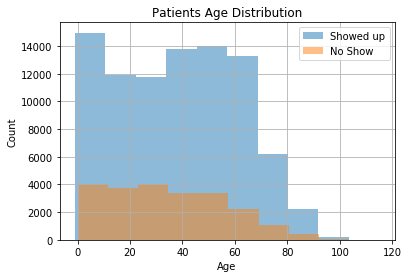

In [89]:
#comparing the distribution of ages for the patients who showed up and those who missed their appointment
df.age[df_show].hist(alpha = 0.5, label='Showed up')
df.age[df_no_show].hist(alpha = 0.5, label = 'No Show')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Patients Age Distribution');

The graph shows that the distribution looks quite similar. One visible difference is that the group that showed up has more infants (aged less than 0) and more elderly patients aging more than 90.  

Second, we'll be exploring the gender.  
  
From the counts below, it appears that there are more females (71840) than males (38687) present in the dataset.

In [90]:
#how many females versus males are there in the dataset
df['gender'].value_counts()

F    71840
M    38687
Name: gender, dtype: int64

However, almost no difference between males and females that are showing up to their appointments than females as per the calculations and graph below.

In [91]:
df.groupby('gender').show.mean()

gender
F    0.796854
M    0.800321
Name: show, dtype: float64

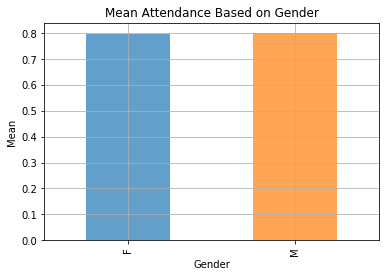

In [92]:
#plot comparing the genders of the patients who showed up
fig, ax = plt.subplots()
df.groupby('gender').show.mean().plot(kind='bar',ax=ax, alpha=0.7)
plt.xlabel('Gender')
plt.ylabel('Mean')
plt.title('Mean Attendance Based on Gender')
ax.grid();

### Q2. Are patients with scholarships more likely to attend their medical appointments?

First, we want to explore the ratio between patients within the dataset who are enrolled in the welfare program to receive a scholarship and patients who are not enrolled. 

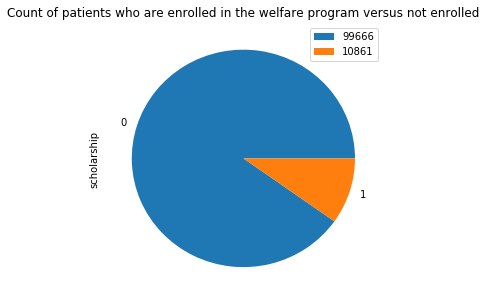

In [93]:
df['scholarship'].value_counts().plot(kind='pie',figsize=(5,5), title='Count of patients who are enrolled in the welfare program versus not enrolled')
plt.legend(labels=df['scholarship'].value_counts(), loc="best");

Out of 110527 patients, only 10861 are enrolled. Being enrolled in a welfare program seems to be a characteristic that only a few number of the whole population is having. And based on the below calculations and graph, looks like the patients that were not enrolled in the program (did not receive a scholarship) were showing up to their medical appointments more than others that were enrolled.

In [94]:
df.groupby('scholarship').show.mean()

scholarship
0    0.801928
1    0.762637
Name: show, dtype: float64

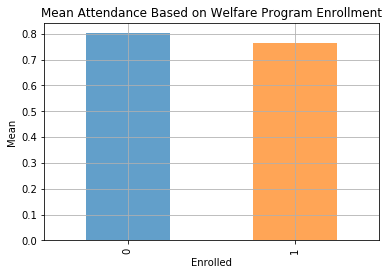

In [95]:
fig, ax = plt.subplots()
df.groupby('scholarship').show.mean().plot(kind='bar',ax=ax, alpha=0.7)
plt.xlabel('Enrolled')
plt.ylabel('Mean')
plt.title('Mean Attendance Based on Welfare Program Enrollment')
ax.grid();

### Q3. Do patients who receive SMSs more likely to show up to the medical appointment?

A good number of patients - 75045 to be exact, have received at least one SMS as a reminder of their medical appointment as shown in the pie chart below.

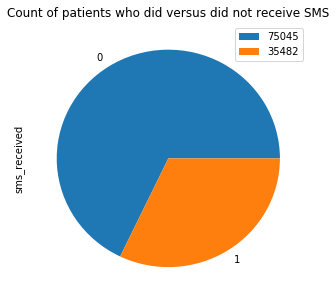

In [96]:
df['sms_received'].value_counts().plot(kind='pie',figsize=(5,5), title='Count of patients who did versus did not receive SMS')
plt.legend(labels=df['sms_received'].value_counts(), loc="best");

However, it seems that the rate of attendance is still lower even after receiving an SMS. There might be an issue with the phone numbers that are registered under the patients' names, this is a limitation in the dataset as it does not show the numbers to check if that data is correct.

In [97]:
#average of showing up to the appointment given that at least 1 SMS was receieved
df.sms_received[df_show].mean()

0.29133411935425357

In [98]:
#average of NOT showing up to the appointment given that at least 1 SMS was receieved
df.sms_received[df_no_show].mean()

0.43837089475334917

The graph below also illustrates the same.

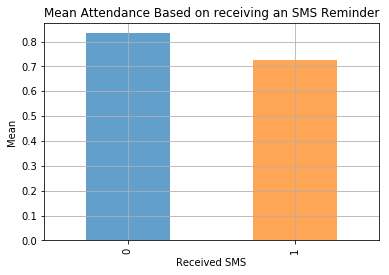

In [99]:
fig, ax = plt.subplots()
df.groupby('sms_received').show.mean().plot(kind='bar',ax=ax,alpha=0.7)
plt.xlabel('Received SMS')
plt.ylabel('Mean')
plt.title('Mean Attendance Based on receiving an SMS Reminder')
ax.grid();

### Q4. Whether showing up to the medical appointment is associated with patients suffering from specific illnesses or chronic diseases?  


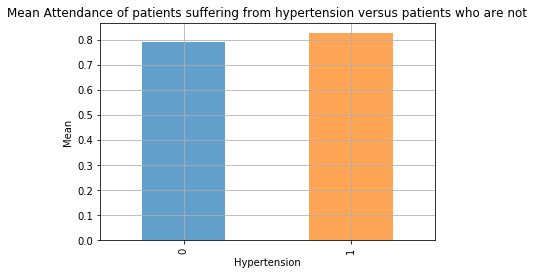

In [100]:
fig, ax = plt.subplots()
df.groupby('hypertension').show.mean().plot(kind='bar',ax=ax,alpha=0.7)
plt.xlabel('Hypertension')
plt.ylabel('Mean')
plt.title('Mean Attendance of patients suffering from hypertension versus patients who are not')
ax.grid();

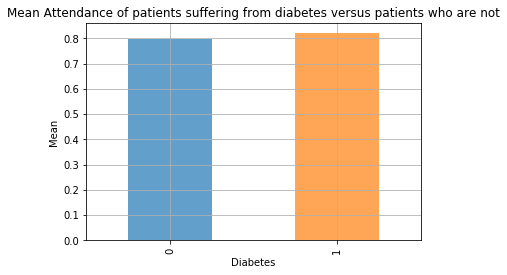

In [101]:
fig, ax = plt.subplots()
df.groupby('diabetes').show.mean().plot(kind='bar',ax=ax,alpha=0.7)
plt.xlabel('Diabetes')
plt.ylabel('Mean')
plt.title('Mean Attendance of patients suffering from diabetes versus patients who are not')
ax.grid();

As per the graphs illustrated above, we can see that the patients suffering from hypertension are more likely to show up to their medical appointments than other who are not. Similarly, a higher percentage of the attendance was by people who are suffering from diabetes.

### Q5. If number of days between scheduling the appointment and the actual appointment day is related to showing up or missing the appointment?  

Using the dates given in the dataset we can calculate the difference in days between the scheduled day and the actual appointment day to be able to find out the number of days between the patient calling to schedule an appointment and showing up to the appointment. This is a derived column that we added to the dataframe before exploring the distribution as shown in the graph below.

In [102]:
#calculating the difference in days
df['diff_days'] = df['appointment_day'].dt.date - df['scheduled_day'].dt.date
df['diff_days']=(df['diff_days']/np.timedelta64(1,'D')).astype(int)
df.head(1)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show,diff_days
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1,0


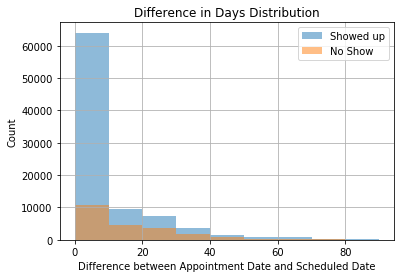

In [103]:
#comparing the distribution of days between the appointment date and scheduled date
#for the patients who showed up versus those who missed their appointment
df.diff_days[df_show].hist(alpha = 0.5, label='Showed up',bins=np.arange(0,100,10))
df.diff_days[df_no_show].hist(alpha = 0.5, label = 'No Show',bins=np.arange(0,100,10))
plt.legend()
plt.xlabel('Difference between Appointment Date and Scheduled Date')
plt.ylabel('Count')
plt.title('Difference in Days Distribution');

We can see in the above distribution that most patients that showed up, scheduled the appointment on the same day or up to around 10 days in advance. Patients who had a longer time between scheduled day and appointment day were showing up less to their appointments.

### Q6. Relationship between the number of appointments the patient has booked and showing up or missing the appointments

Finally, we will explore the frequency by which the patients booked medical appointments and whether the patients who booked more appointments actually showed higher attendance levels than patients who were not booking appointments as frequently.  

Frequency was calculated by grouping the records with the same patient ID and adding this column to the dataframe.

In [104]:
#in this step we counted the frequency of patient visits and created a new dataframe with a new frequency column
df_final = df.groupby('patient_id')['show'].count().reset_index(name="frequency").merge(df,on='patient_id',how='inner')

In [105]:
#printing one patient to make sure the correct frequency is calculated correctly for that patient
df_final.query('patient_id == 999627467948438')

,patient_id,frequency,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show,diff_days
110501,999627467948438,4,5665425,M,2016-05-05 14:25:34,2016-05-09,77,PIEDADE,0,1,1,0,0,0,1,4
110502,999627467948438,4,5697831,M,2016-05-14 09:46:29,2016-05-16,77,PIEDADE,0,1,1,0,0,0,0,2
110503,999627467948438,4,5699863,M,2016-05-16 08:54:37,2016-05-16,77,PIEDADE,0,1,1,0,0,0,1,0
110504,999627467948438,4,5744066,M,2016-05-30 09:46:54,2016-05-30,77,PIEDADE,0,1,1,0,0,0,1,0


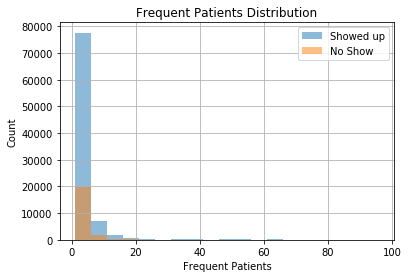

In [106]:
bins_range = np.arange(1,100,5)
df_final.frequency[df_show].hist(alpha = 0.5, label='Showed up', bins=bins_range)
df_final.frequency[df_no_show].hist(alpha = 0.5, label = 'No Show', bins=bins_range)
plt.legend()
plt.xlabel('Frequent Patients')
plt.ylabel('Count')
plt.title('Frequent Patients Distribution');

As shown in the graph, frequency ranged from 2-3 bookings to around 20 and some very few patients with around 30, 60 and 80 bookings. However, it seems that patients who had a range from 2 to 10 booked medical appointments with the hospitals/clinics were showing up more to their appointments that patients with a higher number of booked appointments.

<a id='conclusions'></a>
## Conclusions

In conclusion, we analyzed the appointments dataset to explore some of the characteristics that may be in common between patients that showed up to their medical appointments and others who did not show up. Based on this analysis, we observed the following:  
1- Age distribution between people who showed up and other who did not was quite similar.  
2- The attendance of female patients was similar to the proportion of male patients that attended their appointments.  
3- Receiving an SMS as a reminder of the appointment did not affect the rate of attendance of patients neither did the fact that they were enrolled to the welfare program or not.  
4- It did seem though that the patients suffering from hypertension or diabetes had higher attendance rates.  
5- Moreover, higher show up rate was shown with patients who had less time between the date they scheduled their appointment and the actual appointment date.  
6- Finally, most of the patients that showed up have booked around 2-5 appointments in total.  
  
However, there were a number of limitations when analyzing this dataset:  
1- The SMS_received flag data tells us that number of attendance is lower even after receiving an SMS. But we're missing more details in terms of when the SMS was sent, maybe the hospitals need to send the SMS closer to the appointment day. Or as mentioned, the number that is registered to this patient to verify that the SMS was sent to the correct number.  
2- Most of the data is categorical so we cannot use deeper statistical analysis to investigate relationships.  
3- The population is not representitive enough since most of the patients are not enrolled in the welfare program for example, so we cannot use this characteristic to measure it's effect on attending the medical appointments.  
4- Handicap flag seemed to have error values so another characteristic that we could not rely on in the analysis of this dataset.  